In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('income.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [3]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns  # Categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns    # Numerical columns

In [4]:
# Transformations will be used while doing model training and building but not while EDA

from scipy.stats import boxcox
from scipy.stats import skew

# Function to apply transformations based on skewness
def transform_skewed_data(df):
    for col in ['capital-gain','capital-loss']:
        col_skewness = skew(df[col].dropna())
        
        if col_skewness > 1:  # Right-skewed (Positive skewness)
            # Apply log transformation, handling any zero or negative values by adding a small constant
            df[col] = np.log(df[col] + 1e-5)
            print(f"Applied log transformation to right-skewed column: {col}")
        
        elif col_skewness < -1:  # Left-skewed (Negative skewness)
            # Apply reflect and log transformation
            df[col] = np.log(df[col].max() + 1 - df[col])
            print(f"Applied reflect and log transformation to left-skewed column: {col}")
        
        else:  # Both-sided skewed or near-symmetric
            # Apply Box-Cox transformation, handling negative or zero values by shifting
            if (df[col] <= 0).any():
                df[col] = df[col] - df[col].min() + 1  # Shift values to be positive
            df[col], _ = boxcox(df[col])
            print(f"Applied Box-Cox transformation to column with both-sided skew or near-symmetry: {col}")

    return df

# Apply transformations
df = transform_skewed_data(df)

Applied log transformation to right-skewed column: capital-gain
Applied log transformation to right-skewed column: capital-loss


c:\Users\sharm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


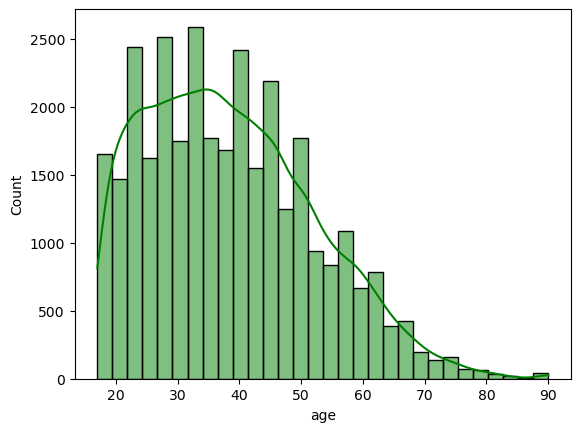

c:\Users\sharm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


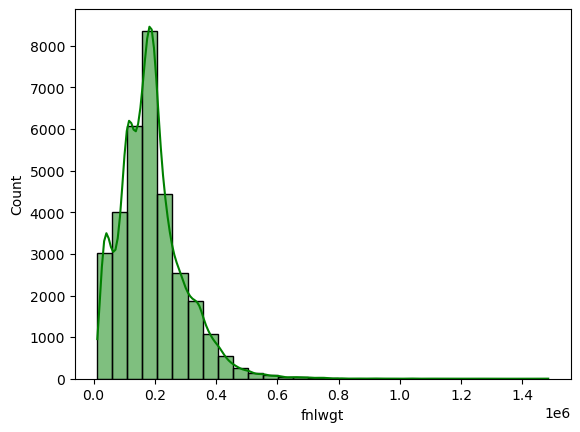

c:\Users\sharm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


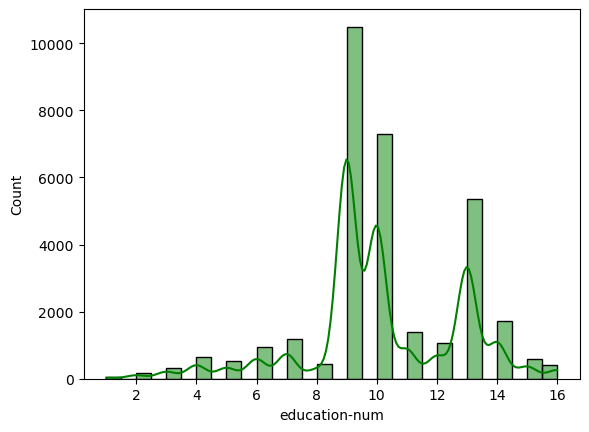

c:\Users\sharm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


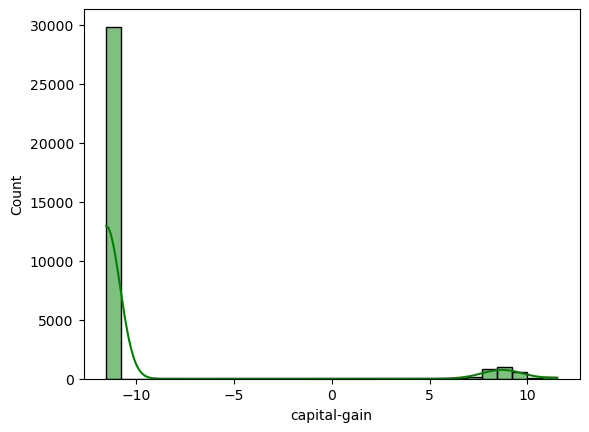

c:\Users\sharm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


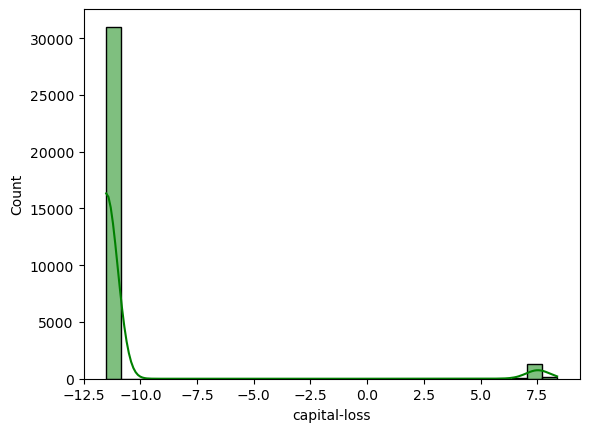

c:\Users\sharm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


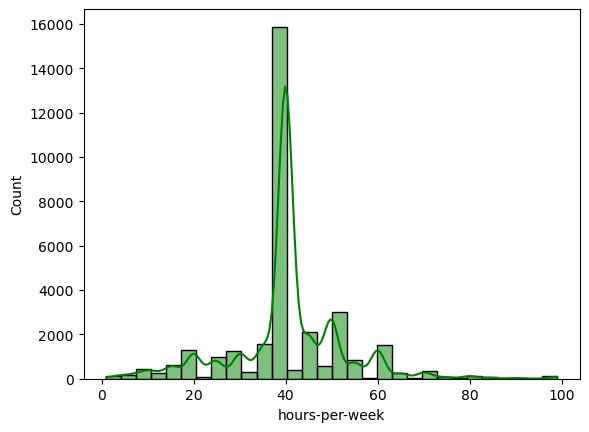

c:\Users\sharm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


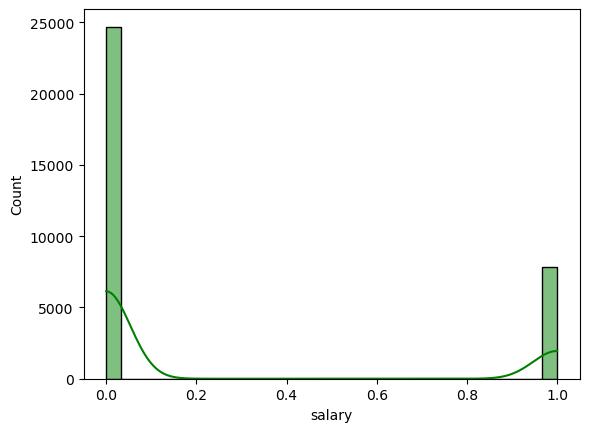

In [5]:
for i in num_cols:
    sns.histplot(data=df,x=i,bins=30,kde=True,color='g')
    plt.show()

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,-9.818166,-10.624904,40.440329,0.240926
std,13.637984,1.055565e+05,2.571633,5.627947,4.013280,12.346889,0.427652
min,17.000000,1.228500e+04,1.000000,-11.512925,-11.512925,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,-11.512925,-11.512925,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,-11.512925,-11.512925,40.000000,0.000000
75%,48.000000,2.369930e+05,12.000000,-11.512925,-11.512925,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,11.512915,8.379309,99.000000,1.000000


### Data preprocessing II

In [8]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [9]:
num_cols

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'salary'],
      dtype='object')

Removing the target variable from numerical features column before transformation

In [10]:
num_cols1= [col for col in num_cols if col!='salary']

In [11]:
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'country'],
      dtype='object')

In [13]:
for i in df[cat_cols]:
    print(f'{i}-->{df[i].unique()}')

workclass-->[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
education-->[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status-->[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation-->[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship-->[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race-->[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex-->[' Male' ' Female']
country-->[' United-States' ' Cuba' ' Jamaica' ' India' ' 

Encoding categorical features and scaling numerical features using ColumnTransformer

In [24]:
# Use LabelEncoder for categorical variables and StandardScaler for numerical variables
preprocessor= ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_cols1),
        ('cat',OneHotEncoder(handle_unknown='ignore'),cat_cols)
 ])

Use Pipeline for consistent transformation of both preprocessing and modeling

In [27]:
pipeline= Pipeline(steps=[('preprocessor',preprocessor)])

In [29]:
# import pickle
# pickle.dump(pipeline,open('pipeline.pkl','wb'))

Defining X and y

In [32]:
X= df.drop(columns=['salary'],axis=1)
y= df['salary']


Splitting dataset into traning and testing datasets

In [35]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

Applying the transformations

In [38]:
X_train_transformed= pipeline.fit_transform(X_train)
X_test_transformed= pipeline.transform(X_test)

### Model Training

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

def evaluate(modelname):
    model = modelname
    model.fit(X_train_transformed,y_train)
    y_train_pred= model.predict(X_train_transformed)
    y_test_pred= model.predict(X_test_transformed)
    accuracy_train= accuracy_score(y_train,y_train_pred)
    accuracy_test= accuracy_score(y_test,y_test_pred)

    return accuracy_train,accuracy_test

models={
"Logistic Regression": LogisticRegression(max_iter=200),
"Decision Tree": DecisionTreeClassifier(),
"Random Forest": RandomForestClassifier(),
"SVM": SVC(),
"K-Nearest Neighbors": KNeighborsClassifier(),
"Gradient Boosting": GradientBoostingClassifier(),
"AdaBoost": AdaBoostClassifier()
}

def model_evaluation(model_dict):
    model_names=model_dict.keys()
    model_list= list(model_dict.values())
    accuracy_scores_train=[]
    accuracy_scores_test=[]
    for i in model_list:
        accuracy_train,accuracy_test= evaluate(i)
        accuracy_scores_train.append(accuracy_train)
        accuracy_scores_test.append(accuracy_test)
        print(f'for {i} model parameters are:')
        print(f'accuracy train:{accuracy_train}')
        print(f'accuracy test:{accuracy_test}')
        print('------------------------------------------------------------------')
    dict={'Model names': model_names,'Training accuracy score':accuracy_scores_train,'Testing accuracy score': accuracy_scores_test}
    df=pd.DataFrame(dict)
    df=df.sort_values(by=['Testing accuracy score'],ascending=False)
    return df

In [47]:
model_evaluation(models)

C:\Users\sharm\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


for LogisticRegression(max_iter=200) model parameters are:
accuracy train:0.8440969687656076
accuracy test:0.8477258758451137
------------------------------------------------------------------
for DecisionTreeClassifier() model parameters are:
accuracy train:0.9999615813131507
accuracy test:0.8166871542716656
------------------------------------------------------------------
for RandomForestClassifier() model parameters are:
accuracy train:0.9999615813131507
accuracy test:0.8538721573448064
------------------------------------------------------------------
for SVC() model parameters are:
accuracy train:0.8619232394636751
accuracy test:0.8469575906576521
------------------------------------------------------------------
for KNeighborsClassifier() model parameters are:
accuracy train:0.8787890429905106
accuracy test:0.8312845728334358
------------------------------------------------------------------
for GradientBoostingClassifier() model parameters are:
accuracy train:0.8676860424910676

,Model names,Training accuracy score,Testing accuracy score
5,Gradient Boosting,0.867686,0.868623
6,AdaBoost,0.860425,0.862170
2,Random Forest,0.999962,0.853872
0,Logistic Regression,0.844097,0.847726
3,SVM,0.861923,0.846958
4,K-Nearest Neighbors,0.878789,0.831285
1,Decision Tree,0.999962,0.816687


#### Defining the Baseline model

In [49]:
model = GradientBoostingClassifier()
model.fit(X_train_transformed,y_train)
y_train_pred= model.predict(X_train_transformed)
y_test_pred= model.predict(X_test_transformed)
accuracy_train= accuracy_score(y_train,y_train_pred)
accuracy_test= accuracy_score(y_test,y_test_pred)
print('Training accuracy:',accuracy_train)
print('Testing accuracy',accuracy_test)

Training accuracy: 0.8676860424910676
Testing accuracy 0.8686232329440688


#### GridSearchCV for hyperparameter tuning

In [29]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1,n_jobs=-1)
grid_search.fit(X_train_transformed, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


C:\Users\sharm\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 2916.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sharm\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sharm\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\sharm\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1512, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                        

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 0.8}
Best Accuracy: 0.8733338237582777
